# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 34
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Check in was so slow, no se..."
1,✅ Trip Verified | My review relates to the ap...
2,✅ Trip Verified | This was my first time flyin...
3,✅ Trip Verified | Lots of cancellations and d...
4,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...


In [63]:
#df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [11]:
df = pd.read_csv("data/BA_reviews.csv")

In [12]:
df["reviews"].str.split("|")

0       [✅ Trip Verified ,   Check in was so slow, no ...
1       [✅ Trip Verified ,   My review relates to the ...
2       [✅ Trip Verified ,  This was my first time fly...
3       [✅ Trip Verified ,   Lots of cancellations and...
4       [✅ Trip Verified ,  BA 242 on the 6/2/23. Boar...
                              ...                        
3395    [Sao Paulo - London Heathrow Club World. Sat i...
3396    [Travelled from Barbados to London Gatwick and...
3397    [LHR to BKK in club world over night flight. L...
3398    [Flew YVR to MUC via LHR. I had high expectati...
3399    [BA 214 in the late spring os a 747-400. Lie-f...
Name: reviews, Length: 3400, dtype: object

# Cleaning

In [76]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"Check in was so slow, no self check in and b...",Check in was so slow no self check in and bag...
1,My review relates to the appalling experienc...,My review relates to the appalling experience...
2,This was my first time flying with BA & I was...,This was my first time flying with BA I was p...
3,Lots of cancellations and delays and no one ...,Lots of cancellations and delays and no one a...
4,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...


## tokenization and lematization

In [77]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"Check in was so slow, no self check in and b...",Check in was so slow no self check in and bag...,"[(Check, n), (slow, a), (self, n), (check, n),..."
1,My review relates to the appalling experienc...,My review relates to the appalling experience...,"[(review, n), (relates, v), (appalling, a), (e..."
2,This was my first time flying with BA & I was...,This was my first time flying with BA I was p...,"[(first, a), (time, n), (flying, v), (BA, n), ..."
3,Lots of cancellations and delays and no one ...,Lots of cancellations and delays and no one a...,"[(Lots, n), (cancellations, n), (delays, n), (..."
4,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a..."


In [79]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Check in was so slow, no self check in and b...",Check in was so slow no self check in and bag...,"[(Check, n), (slow, a), (self, n), (check, n),...",Check slow self check bag drop Boarding ok f...
1,My review relates to the appalling experienc...,My review relates to the appalling experience...,"[(review, n), (relates, v), (appalling, a), (e...",review relate appalling experience British A...
2,This was my first time flying with BA & I was...,This was my first time flying with BA I was p...,"[(first, a), (time, n), (flying, v), (BA, n), ...",first time fly BA pleasantly surprised Islam...
3,Lots of cancellations and delays and no one ...,Lots of cancellations and delays and no one a...,"[(Lots, n), (cancellations, n), (delays, n), (...",Lots cancellation delay one apologize Edinbu...
4,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a...",BA Boarding delay due late arrival incoming ...


In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Check in was so slow, no self check in and b...",Check in was so slow no self check in and bag...,"[(Check, n), (slow, a), (self, n), (check, n),...",Check slow self check bag drop Boarding ok f...,0.9246,Positive
1,My review relates to the appalling experienc...,My review relates to the appalling experience...,"[(review, n), (relates, v), (appalling, a), (e...",review relate appalling experience British A...,-0.9484,Negative
2,This was my first time flying with BA & I was...,This was my first time flying with BA I was p...,"[(first, a), (time, n), (flying, v), (BA, n), ...",first time fly BA pleasantly surprised Islam...,0.9804,Positive
3,Lots of cancellations and delays and no one ...,Lots of cancellations and delays and no one a...,"[(Lots, n), (cancellations, n), (delays, n), (...",Lots cancellation delay one apologize Edinbu...,-0.4215,Negative
4,BA 242 on the 6/2/23. Boarding was delayed du...,BA on the Boarding was delayed due to late ar...,"[(BA, n), (Boarding, n), (delayed, v), (due, a...",BA Boarding delay due late arrival incoming ...,0.9493,Positive


In [81]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2018
Negative    1022
Neutral      360
Name: Analysis, dtype: int64

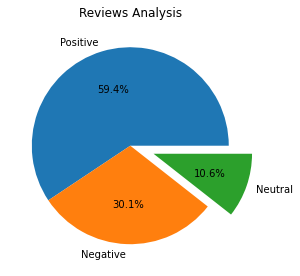

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False);

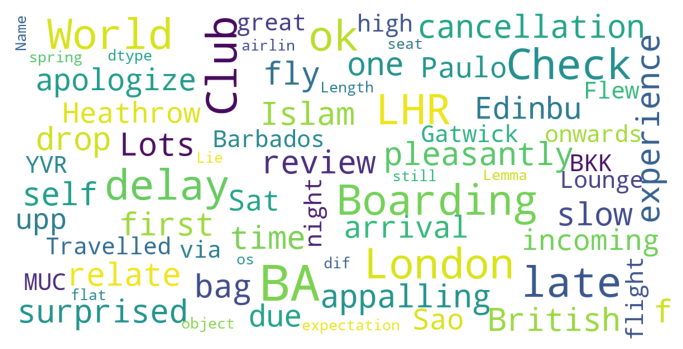

In [84]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [14]:
len(df["reviews"].str.split("|")[0])

2

In [15]:
len(df["reviews"].str.split("|")[3388])

1

In [16]:
new = []
for review in df["reviews"].str.split("|"):
    if len(review) == 2:
        new.append(review[1])
    elif len(review) == 1:
        new.append(review[0])
    else:
        print("Error")
        

In [17]:
df["reviews"] = new

In [18]:
df["reviews"]

0         Check in was so slow, no self check in and b...
1         My review relates to the appalling experienc...
2        This was my first time flying with BA & I was...
3         Lots of cancellations and delays and no one ...
4        BA 242 on the 6/2/23. Boarding was delayed du...
                              ...                        
3395    Sao Paulo - London Heathrow Club World. Sat in...
3396    Travelled from Barbados to London Gatwick and ...
3397    LHR to BKK in club world over night flight. Lo...
3398    Flew YVR to MUC via LHR. I had high expectatio...
3399    BA 214 in the late spring os a 747-400. Lie-fl...
Name: reviews, Length: 3400, dtype: object

In [23]:
df = df[['reviews']]

In [31]:
df

,reviews
0,"Check in was so slow, no self check in and b..."
1,My review relates to the appalling experienc...
2,This was my first time flying with BA & I was...
3,Lots of cancellations and delays and no one ...
4,BA 242 on the 6/2/23. Boarding was delayed du...
...,...
3395,Sao Paulo - London Heathrow Club World. Sat in...
3396,Travelled from Barbados to London Gatwick and ...
3397,LHR to BKK in club world over night flight. Lo...
3398,Flew YVR to MUC via LHR. I had high expectatio...


In [19]:
!pip install TextBlob

In [32]:
from textblob import TextBlob
import pandas as pd

sentiments = []

for review in df['reviews']:
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        sentiments.append('positive')
    elif polarity < 0:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

df1 = pd.DataFrame({'review': df['reviews'], 'sentiment': sentiments})
print(df1)

                                                 review sentiment
0       Check in was so slow, no self check in and b...  positive
1       My review relates to the appalling experienc...  negative
2      This was my first time flying with BA & I was...  positive
3       Lots of cancellations and delays and no one ...  positive
4      BA 242 on the 6/2/23. Boarding was delayed du...  positive
...                                                 ...       ...
3395  Sao Paulo - London Heathrow Club World. Sat in...  positive
3396  Travelled from Barbados to London Gatwick and ...  positive
3397  LHR to BKK in club world over night flight. Lo...  positive
3398  Flew YVR to MUC via LHR. I had high expectatio...  negative
3399  BA 214 in the late spring os a 747-400. Lie-fl...  positive

[3400 rows x 2 columns]


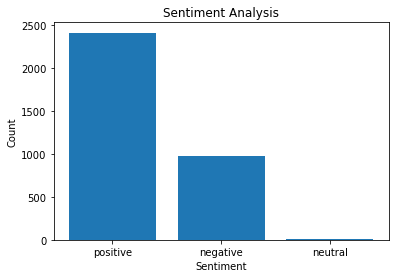

In [50]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = df1['sentiment'].value_counts()

# Visualize the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [53]:
total_rows = len(df1)

positive_pct = (sentiment_counts['positive'] / total_rows) * 100
neutral_pct = (sentiment_counts['neutral'] / total_rows) * 100
negative_pct = (sentiment_counts['negative'] / total_rows) * 100

print(f"Positive: {positive_pct:.2f}%")
print(f"Negative: {negative_pct:.2f}%")
print(f"Neutral: {neutral_pct:.2f}%")

Positive: 71.03%
Negative: 28.59%
Neutral: 0.38%


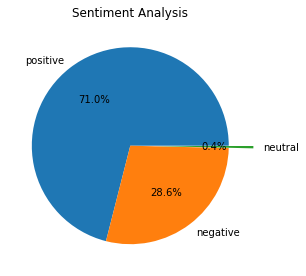

In [59]:
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Sentiment Analysis")
plt.pie(sentiment_counts.values, labels = sentiment_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False);

In [60]:
pip install wordcloud

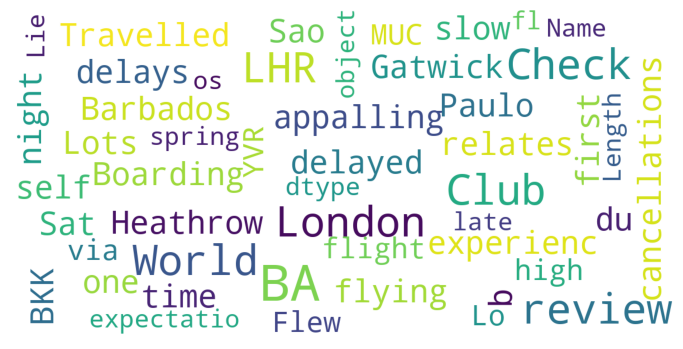

In [65]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df1.review)

In [66]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df1['Sentiment'] = df1['review'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df1['Analysis'] = df1['Sentiment'].apply(vader_analysis)
df1.head()

,review,sentiment,Sentiment,Analysis
0,"Check in was so slow, no self check in and b...",positive,0.6022,Positive
1,My review relates to the appalling experienc...,negative,-0.6126,Negative
2,This was my first time flying with BA & I was...,positive,0.8204,Positive
3,Lots of cancellations and delays and no one ...,positive,-0.4141,Negative
4,BA 242 on the 6/2/23. Boarding was delayed du...,positive,0.9564,Positive


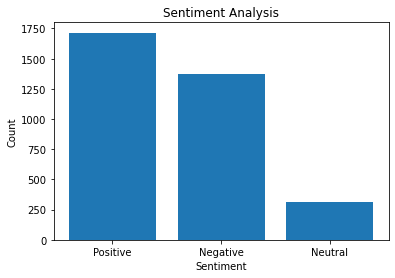

In [71]:
# Count the number of positive, negative, and neutral sentiments
sentiment_counts1 = df1['Analysis'].value_counts()

# Visualize the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

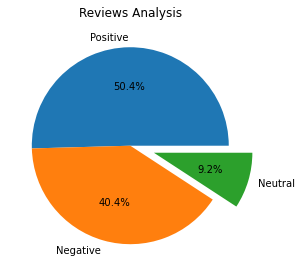

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(
    sentiment_counts1.values, 
    labels = sentiment_counts1.index, 
    explode = (0, 0, 0.25), 
    autopct='%1.1f%%', 
    shadow=False
);